In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("properties_cleaned_v2.csv")

In [62]:
df.head()

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,NaN,650.0,0,0,0,0,0,1,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [63]:
df.shape

(3681, 23)

## price

<Axes: ylabel='Density'>

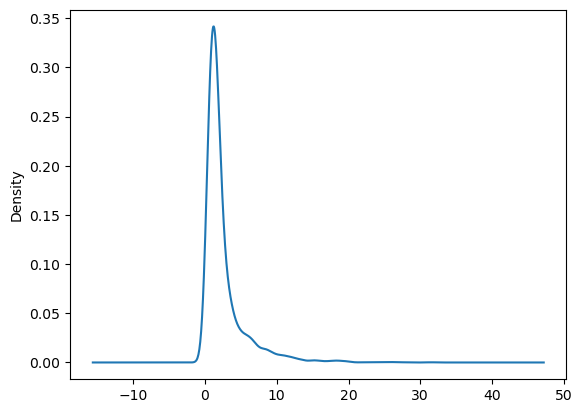

In [64]:
df["price"].plot(kind = "kde")

<Axes: >

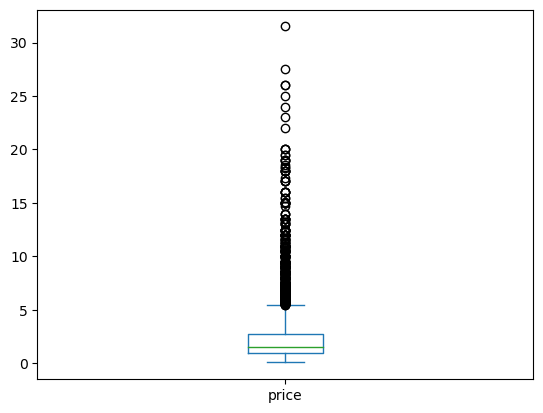

In [65]:
df["price"].plot(kind = "box")

In [66]:
df["price"].describe()

count    3664.000000
mean        2.533248
std         2.979058
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [67]:
# cal q1,q3,1qr
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# defining upper and lower bound
upper = Q3+ 1.5 * IQR
lower = Q1 - 1.5 * IQR



In [68]:
# finding outliers
outliers = df[(df['price'] < lower) | (df['price'] > upper)]

In [69]:
outliers

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
26,flat,m3m golfestate,sector 65,6.15,18331.0,3354.97,Built Up area: 3355 (311.69 sq.m.)Carpet area:...,3.0,4.0,2,...,NaN,3355.0,2200.0,0,0,0,0,0,0,34
27,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.02,Carpet area: 2880 (267.56 sq.m.),3.0,5.0,3+,...,NaN,NaN,2880.0,0,1,0,0,0,1,49
239,flat,tulip monsella,sector 53,8.25,28000.0,2946.43,Super Built up area 2940(273.13 sq.m.),3.0,4.0,3,...,2940.0,NaN,NaN,0,1,0,0,0,2,35
271,flat,dlf the grove,sector 54,5.70,41245.0,1381.99,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,...,NaN,1382.0,NaN,0,0,0,0,0,0,46
277,flat,m3m golfestate,sector 65,6.15,15998.0,3844.23,Carpet area: 3844 (357.12 sq.m.),3.0,5.0,3+,...,NaN,NaN,3844.0,0,1,0,0,0,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,house,unitech espace,sector 50,7.42,34351.0,2160.00,Plot area 2160(200.67 sq.m.)Built Up area: 320...,4.0,4.0,3,...,NaN,3200.0,NaN,0,0,0,0,0,1,88
3658,house,dlf city phase 1,sector 26,9.25,47803.0,1935.00,Plot area 1935(179.77 sq.m.)Built Up area: 700...,12.0,12.0,3+,...,NaN,7000.0,NaN,0,1,0,1,0,1,43
3660,house,NaN,sector 47,6.09,33665.0,1809.00,Plot area 201(168.06 sq.m.)Built Up area: 180 ...,12.0,11.0,3+,...,NaN,180.0,150.0,0,0,0,1,0,2,44
3672,house,NaN,sector 46,5.65,23870.0,2367.00,Plot area 263(219.9 sq.m.),8.0,6.0,3+,...,NaN,2367.0,NaN,0,1,0,0,0,1,67


In [70]:
n_outliers = outliers.shape[0]
outlier_stats = outliers['price'].describe()

n_outliers, outlier_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

## persf_area

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2438712223.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["persf_area"])


<Axes: xlabel='persf_area', ylabel='Density'>

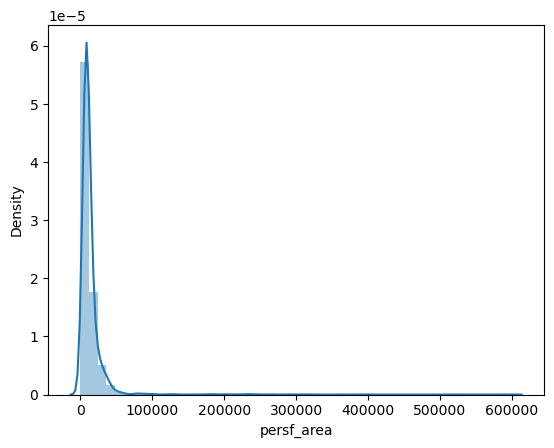

In [71]:
sns.distplot(df["persf_area"])

<Axes: >

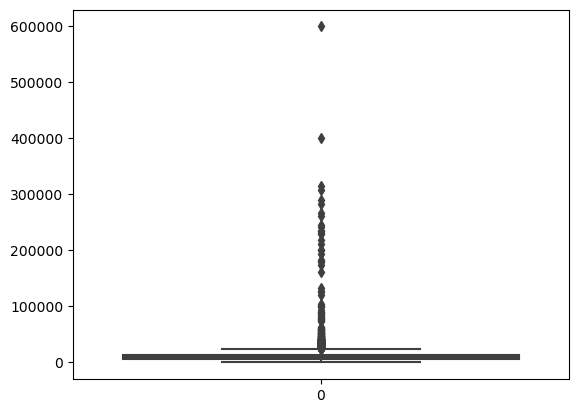

In [72]:
sns.boxplot(df["persf_area"])

In [82]:
# cal q1,q3,1qr
Q1 = df['persf_area'].quantile(0.25)
Q3 = df['persf_area'].quantile(0.75)
IQR = Q3 - Q1

# defining upper and lower bound
upper = Q3+ 1.5 * IQR
lower = Q1 - 1.5 * IQR

In [83]:
# finding outliers
outliers = df[(df['persf_area'] < lower) | (df['persf_area'] > upper)]

In [84]:
outliers

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
30,flat,ompee k s residency,sector 110,1.60,26936.0,594.00,Carpet area: 66 (55.18 sq.m.),2.0,2.0,2,...,NaN,NaN,66.00000,0,0,0,0,0,0,0
239,flat,tulip monsella,sector 53,8.25,28000.0,2946.43,Super Built up area 2940(273.13 sq.m.),3.0,4.0,3,...,2940.0,NaN,NaN,0,1,0,0,0,2,35
244,flat,emaar digihomes,sector 62,4.25,26562.0,1600.03,Carpet area: 1600 (148.64 sq.m.),3.0,3.0,3,...,NaN,NaN,1600.00000,1,0,0,0,0,0,16
271,flat,dlf the grove,sector 54,5.70,41245.0,1381.99,Built Up area: 1382 (128.39 sq.m.),3.0,3.0,3,...,NaN,1382.0,NaN,0,0,0,0,0,0,46
294,flat,puri the aravallis,sector 61,3.90,33209.0,1174.38,Carpet area: 1249.65 (116.1 sq.m.),3.0,4.0,3+,...,NaN,NaN,1249.68879,0,1,0,0,0,0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,house,NaN,sector 57,4.75,28787.0,1650.00,Plot area 1600(148.64 sq.m.)Built Up area: 170...,3.0,3.0,3,...,NaN,1700.0,1650.00000,0,0,1,0,0,1,96
3677,house,dlf city phase 1,sector 26,5.50,30556.0,1800.00,Plot area 200(167.23 sq.m.),4.0,4.0,3,...,NaN,1800.0,NaN,1,1,0,1,0,0,69
3678,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.00,Plot area 150(125.42 sq.m.),3.0,2.0,3,...,NaN,1350.0,NaN,1,0,0,0,0,0,35
3679,house,dlf city phase 1,sector 26,4.50,33333.0,1350.00,Plot area 150(125.42 sq.m.),3.0,3.0,2,...,NaN,1350.0,NaN,1,1,0,0,0,0,70


In [85]:
n_outliers = outliers.shape[0]
outlier_stats = outliers['persf_area'].describe()

n_outliers, outlier_stats

(353,
 count       353.000000
 mean      52672.226629
 std       61218.883253
 min       24500.000000
 25%       28233.000000
 50%       33404.000000
 75%       42032.000000
 max      600000.000000
 Name: persf_area, dtype: float64)

In [86]:
outliers['area'] = outliers['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\1621373245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['area'] = outliers['area'].apply(lambda x:x*9 if x<1000 else x)


In [87]:
outliers['persf_area'] = round((outliers['price']*10000000)/outliers['area'])

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2070190512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['persf_area'] = round((outliers['price']*10000000)/outliers['area'])


In [88]:
outliers['persf_area'].describe()

count      353.000000
mean     29371.628895
std      12417.960843
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: persf_area, dtype: float64

In [91]:
df.update(outliers)

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2131399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['persf_area'])


<Axes: xlabel='persf_area', ylabel='Density'>

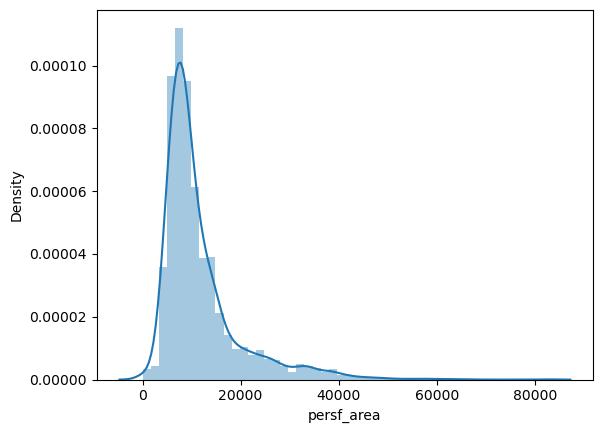

In [92]:
sns.distplot(df['persf_area'])

<Axes: xlabel='persf_area'>

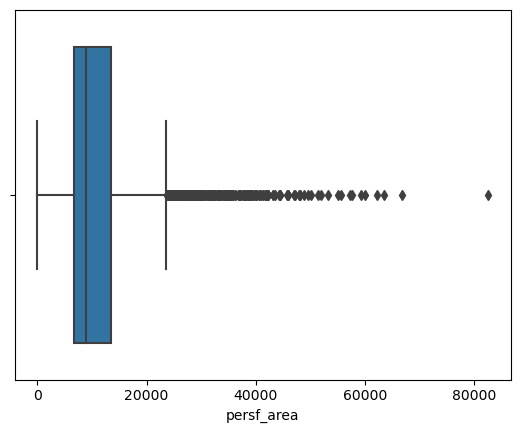

In [94]:
sns.boxplot(x=df['persf_area'])

In [95]:
df[df['persf_area']>50000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2553,flat,unitech vistas,sector 70,9.00,57507.0,1565.03,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,NaN,...,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3026,house,malibu towne,sector 47,8.50,53125.0,1600.00,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,...,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,99.0
3183,house,project housing board colony,sector 31,8.00,63492.0,1260.00,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,...,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3297,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.00,Plot area 1000(92.9 sq.m.),3.0,3.0,0,...,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3312,house,NaN,sector 26,14.75,51864.0,2844.00,Plot area 316(264.22 sq.m.),16.0,20.0,3+,...,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
3320,house,emaar the palm springs,sector 54,24.00,66667.0,3600.00,Plot area 400(37.16 sq.m.),5.0,5.0,2,...,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,122.0
3355,house,NaN,sector 26,26.00,82540.0,3150.00,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,...,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,1.0,72.0
3397,house,dlf city plots,sector 26,26.00,57206.0,4545.00,Plot area 505(422.24 sq.m.),6.0,7.0,3+,...,NaN,4545.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,138.0
3482,house,emaar the palm springs,sector 54,14.00,62222.0,2250.00,Plot area 250(209.03 sq.m.),4.0,5.0,3+,...,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,160.0
3546,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.00,Plot area 360(301.01 sq.m.),4.0,4.0,3+,...,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0


In [96]:
df = df[df['persf_area'] <= 50000]

## area

In [ ]:
#sns.distplot(df['area'])

<Axes: xlabel='area'>

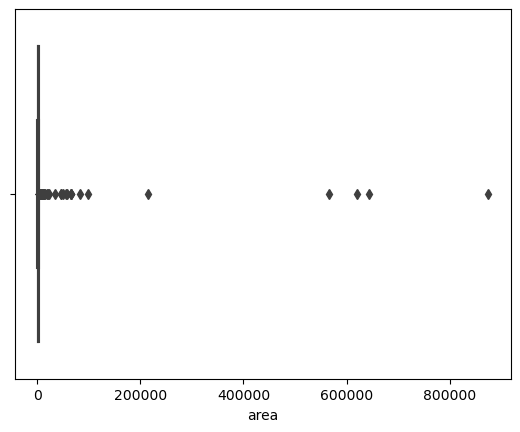

In [97]:
sns.boxplot(x=df['area'])

In [98]:
df['area'].describe()

count      3651.000000
mean       2946.092925
std       23195.531665
min         145.000000
25%        1261.995000
50%        1750.050000
75%        2346.995000
max      875000.000000
Name: area, dtype: float64

In [99]:
df[df['area'] > 100000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
110,flat,signature the roselia,sector 95,0.45,7.0,642857.14,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,...,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
1270,flat,ramsons kshitij,sector 95,0.31,5.0,620000.00,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,...,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
1928,flat,signature global solera 2,sector 107,0.51,9.0,566666.67,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,...,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2386,flat,hcbs sports ville,sohna road,0.35,4.0,875000.00,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,...,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
3132,house,NaN,sector 50,5.00,232.0,215517.00,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,...,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [100]:
df = df[df['area'] < 100000]

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

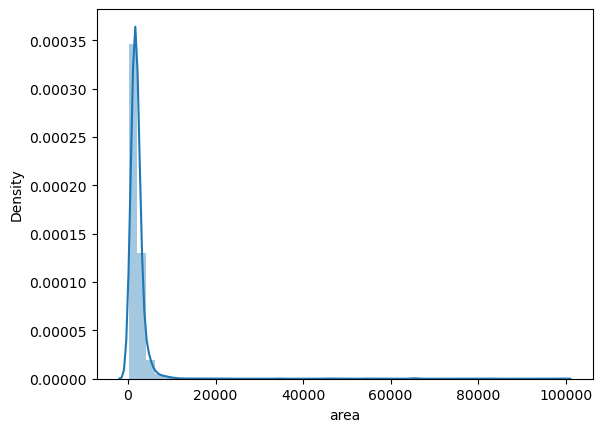

In [101]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

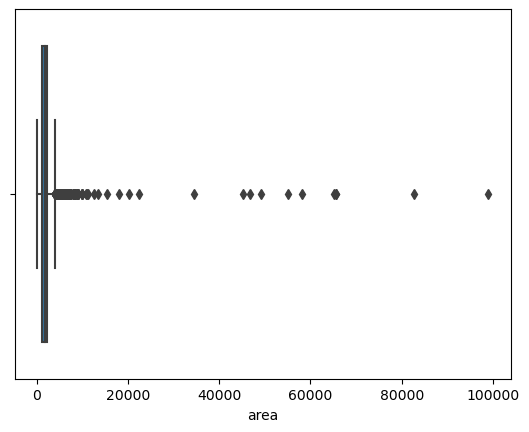

In [102]:
sns.boxplot(x=df['area'])

In [103]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3438,house,NaN,sector 26,18.40,1859.0,98978.00,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3101,house,ganpati heights apartment,sector 13,1.25,151.0,82781.00,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
2282,flat,rof ananda,sector 95,0.38,58.0,65517.24,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,...,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
1272,flat,rof ananda,sector 95,0.38,58.0,65517.24,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3173,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.00,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,flat,pyramid elite,sector 86,0.46,79.0,58227.85,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,...,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1271,flat,rof ananda,sector 95,0.33,60.0,55000.00,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,...,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1393,flat,signature the serenas,sohna road,0.28,57.0,49122.81,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,...,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
3350,house,NaN,sector 25,7.30,1560.0,46795.00,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
1268,flat,ramsons kshitij,sector 95,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,...,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [106]:
df["society"]=df["society"].replace(np.nan,"independent")

In [107]:
df["society"].isnull().sum()

0

In [108]:
df.drop(index=[3438,2282,3173,79, 1271, 1393, 1268, 1273, 2921], inplace=True)

In [109]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3101,house,ganpati heights apartment,sector 13,1.25,151.0,82781.00,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
1272,flat,rof ananda,sector 95,0.38,58.0,65517.24,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3350,house,independent,sector 25,7.30,1560.0,46795.00,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
2928,house,independent,sector 57,6.25,2778.0,22498.00,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,1.0,61.0
3412,house,independent,sector 43,5.50,2716.0,20250.00,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,...,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,1.0,123.0
2377,flat,godrej air,sector 85,2.50,1379.0,18129.08,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,...,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,1.0,44.0
2935,house,unitech aspen greens,sector 50,6.95,4490.0,15479.00,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,...,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,0.0,160.0
2680,flat,godrej icon,sector 88a,1.75,1384.0,12644.51,Carpet area: 1175.11,3.0,3.0,3+,...,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,55.0
3364,house,independent,sector 43,27.50,24366.0,11286.00,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,...,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0
1600,flat,m3m golfestate,sector 65,13.20,12000.0,11000.00,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [110]:
df.loc[3101,'area'] = 115*9
df.loc[1272,'area'] = 7250
df.loc[3350,'area'] = 5800
df.loc[2928,'area'] = 2660
df.loc[3412,'area'] = 2850
df.loc[2377,'area'] = 1812
df.loc[2935,'area'] = 2160
df.loc[2680,'area'] = 1175

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

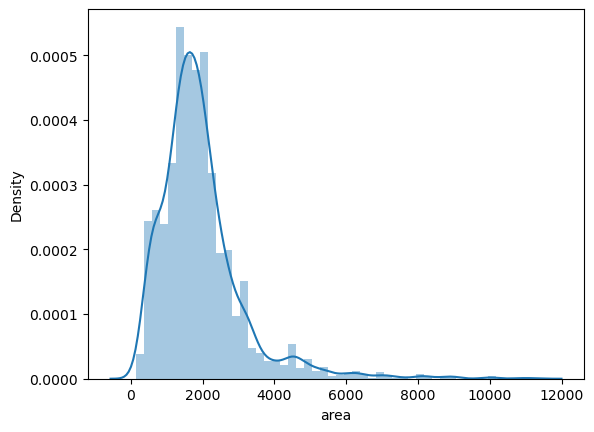

In [111]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

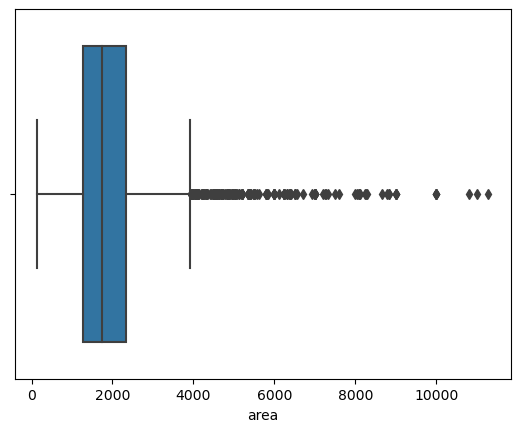

In [112]:
sns.boxplot(x=df['area'])

In [113]:
df['area'].describe()

count     3637.000000
mean      1949.817014
std       1215.273088
min        145.000000
25%       1260.050000
50%       1745.790000
75%       2325.010000
max      11286.000000
Name: area, dtype: float64

## bedroom

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\11865314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedroom'])


<Axes: xlabel='bedroom', ylabel='Density'>

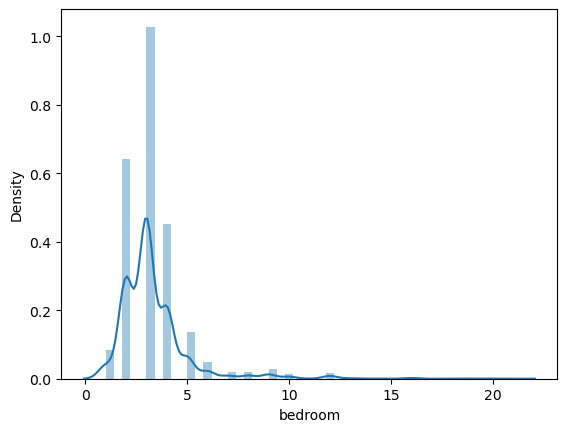

In [115]:
sns.distplot(df['bedroom'])

<Axes: xlabel='bedroom'>

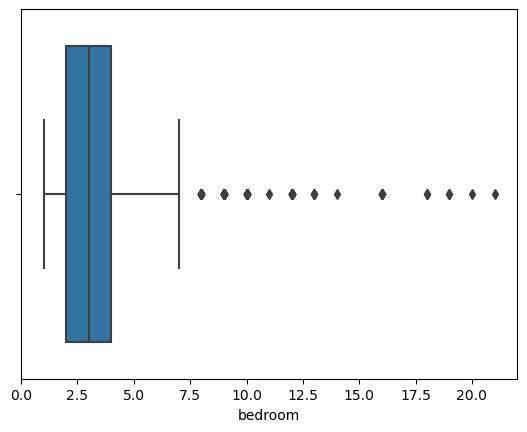

In [117]:
sns.boxplot(x=df['bedroom'])

In [119]:
df['bedroom'].describe()

count    3637.000000
mean        3.331042
std         1.825849
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedroom, dtype: float64

In [121]:
df[df['bedroom'] > 10].sort_values('bedroom',ascending=False)

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2824,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,...,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
2826,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,...,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
3281,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,...,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
2949,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,...,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
3529,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,...,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
2929,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,...,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
3547,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,...,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3509,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,...,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0
2860,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,...,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0
2862,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,...,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0


In [123]:
df = df[df['bedroom'] <= 10]

In [126]:
df.shape[0]

3592

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\11865314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedroom'])


<Axes: xlabel='bedroom', ylabel='Density'>

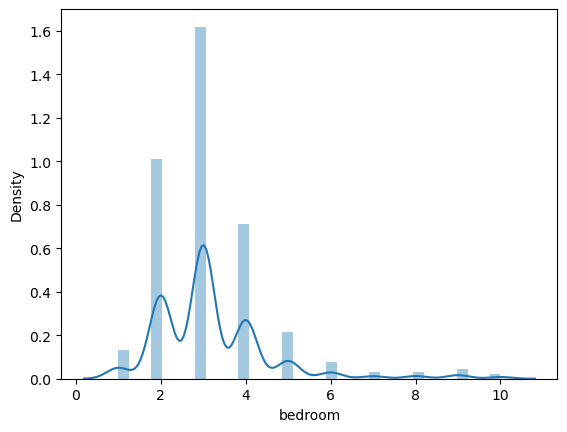

In [127]:
sns.distplot(df['bedroom'])

<Axes: xlabel='bedroom'>

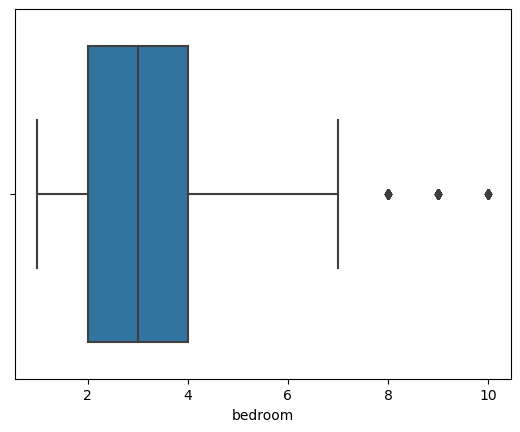

In [129]:
sns.boxplot(x=df['bedroom'])

## bathroom

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

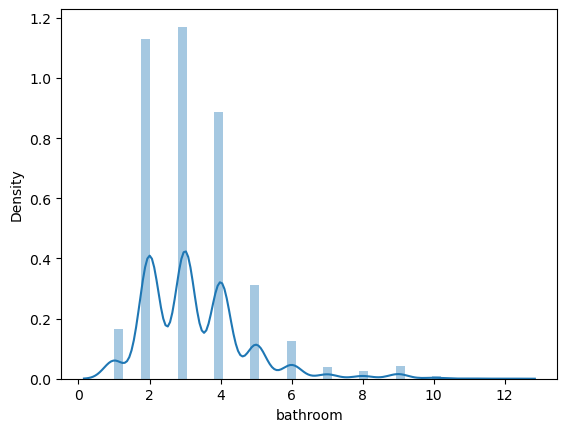

In [130]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

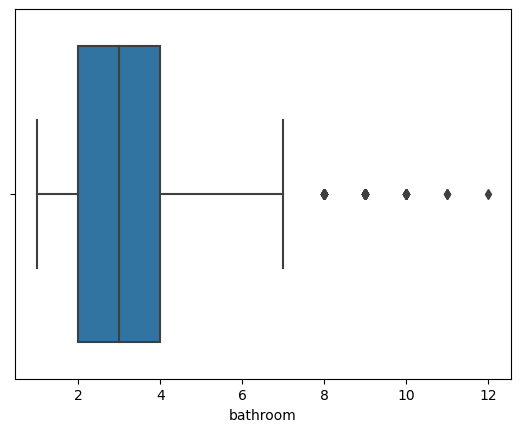

In [131]:
sns.boxplot(x=df['bathroom'])

In [132]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3258,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,...,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0
3203,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,...,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,38.0
3257,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,...,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0


## super built-up area

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

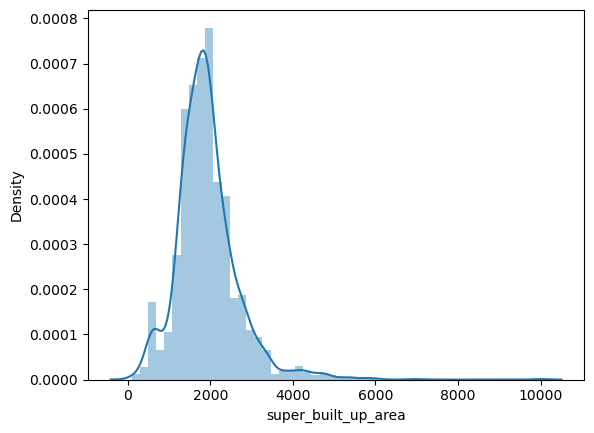

In [133]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

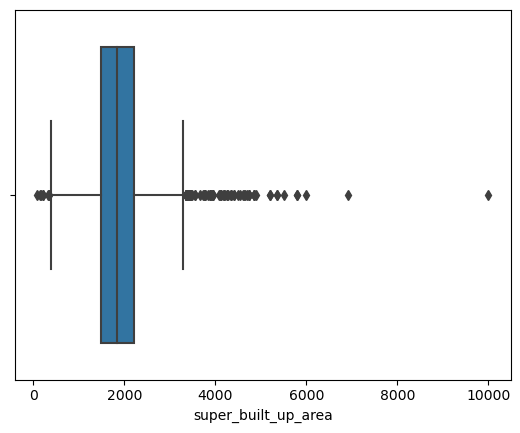

In [134]:
sns.boxplot(x=df['super_built_up_area'])

In [135]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [136]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
636,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.00,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,...,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0
1506,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.02,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,...,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0


## built up area

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

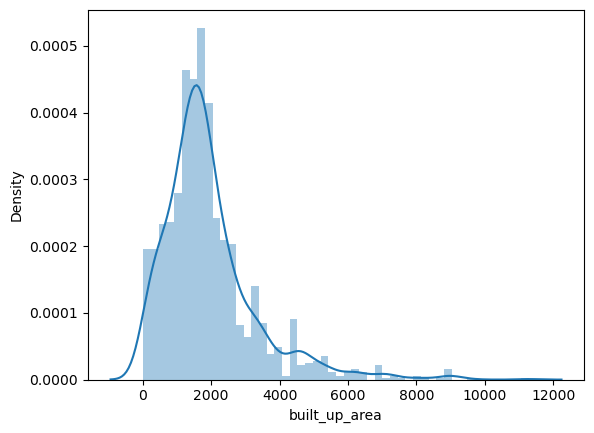

In [137]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

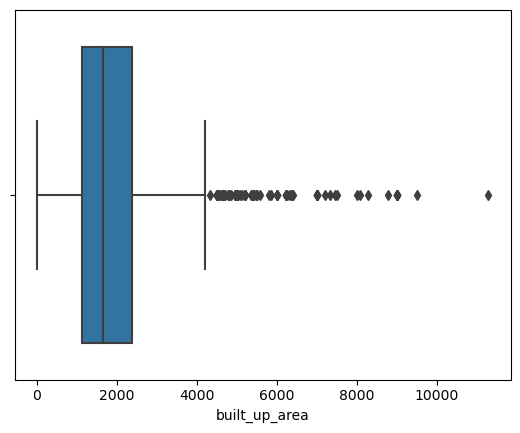

In [138]:
sns.boxplot(x=df['built_up_area'])

In [139]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3364,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,...,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0


## carpet area

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

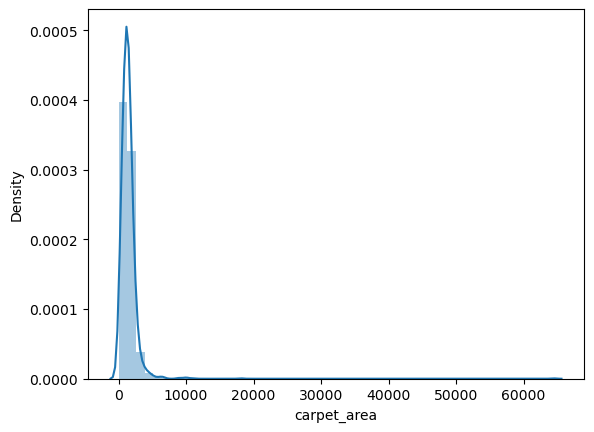

In [140]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

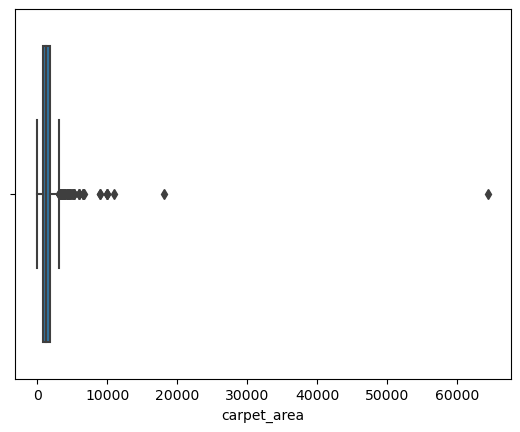

In [141]:
sns.boxplot(x=df['carpet_area'])

In [142]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1272,flat,rof ananda,sector 95,0.38,58.0,7250.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
1600,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
2377,flat,godrej air,sector 85,2.50,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,...,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0


In [143]:
df.loc[2377,'carpet_area'] = 1812

In [144]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1272,flat,rof ananda,sector 95,0.38,58.0,7250.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
1600,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0


## luxuray_Score

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

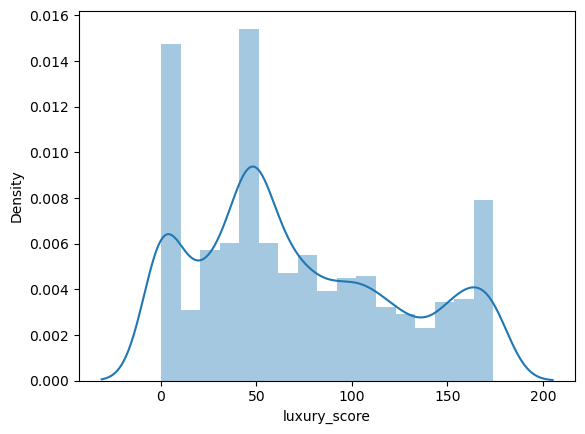

In [145]:
sns.distplot(df['luxury_score'])

<Axes: >

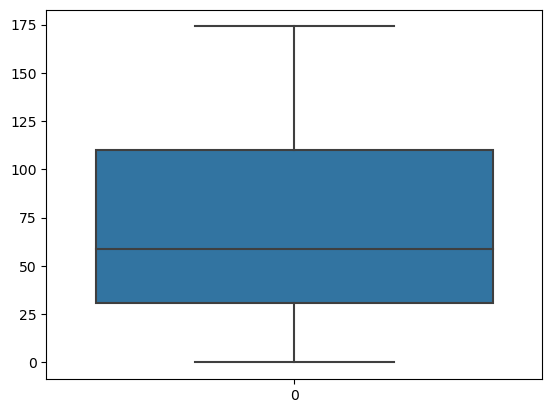

In [146]:
sns.boxplot(df['luxury_score'])

In [147]:
df.shape

(3592, 23)

## persf_area again

In [148]:
df['persf_area'] = round((df['price']*10000000)/df['area'])

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2131399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['persf_area'])


<Axes: xlabel='persf_area', ylabel='Density'>

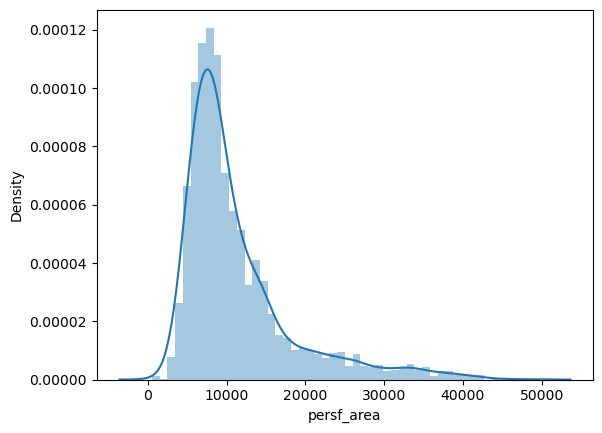

In [149]:
sns.distplot(df['persf_area'])

<Axes: >

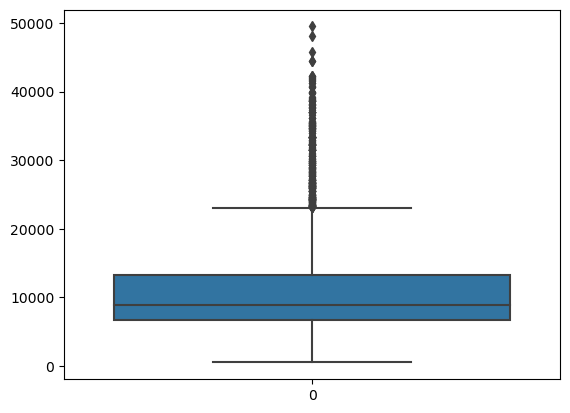

In [150]:
sns.boxplot(df['persf_area'])

In [151]:
df[df['persf_area'] > 42000]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3231,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,...,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3274,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,...,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3349,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,...,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0
3441,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,...,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,60.0
3447,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,...,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
3528,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,...,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,103.0
3543,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,...,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0
3557,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,...,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0
3661,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,...,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0


In [153]:
x = df[df['persf_area'] <= 20000]
(x['area']/x['bedroom']).quantile(0.02)

183.44000000000003

In [154]:
df[(df['area']/df['bedroom'])<183]

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2837,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7.0,7.0,3+,...,NaN,900.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,27.0
2941,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9.0,7.0,3+,...,NaN,3750.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,7.0
2951,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6.0,4.0,3,...,NaN,900.0,NaN,0.0,1.0,0.0,0.0,1.0,1.0,44.0
2953,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5.0,4.0,3,...,NaN,725.0,675.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0
2955,house,independent,sector 105,0.60,13333.0,450.0,Built Up area: 450 (41.81 sq.m.),3.0,3.0,0,...,NaN,450.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10.0,9.0,3+,...,NaN,1620.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,36.0
3643,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8.0,8.0,3+,...,NaN,162.0,160.0,0.0,0.0,1.0,1.0,0.0,1.0,94.0
3645,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8.0,8.0,3,...,NaN,62.0,60.0,0.0,0.0,0.0,0.0,1.0,1.0,40.0
3655,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9.0,9.0,3+,...,NaN,165.0,164.0,0.0,0.0,0.0,1.0,1.0,1.0,41.0


In [155]:
x = df[df['persf_area'] <= 20000]
(x['area']/x['bedroom']).quantile(0.05)

250.72500000000005

In [158]:
df[(df['area']/df['bedroom'])<250].head()

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
116,flat,czar mahira homes 63a,sector 63a,0.42,7407.0,567.03,Carpet area: 567 (52.68 sq.m.),3.0,2.0,2,...,NaN,NaN,567.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,flat,mvn athens,sohna road,0.26,5397.0,481.75,Carpet area: 481.74 (44.76 sq.m.),2.0,2.0,1,...,NaN,NaN,481.792164,0.0,0.0,0.0,0.0,0.0,0.0,37.0
198,flat,supertech basera,sector 79,0.36,7643.0,471.02,Built Up area: 546 (50.73 sq.m.)Carpet area: 4...,2.0,2.0,1,...,NaN,546.0,471.000000,0.0,0.0,0.0,0.0,0.0,0.0,60.0
314,flat,mvn athens,sohna road,0.27,5897.0,457.86,Carpet area: 457.81 (42.53 sq.m.),2.0,2.0,1,...,NaN,NaN,457.788667,0.0,0.0,0.0,0.0,1.0,1.0,35.0
539,flat,signature global solera,sector 107,0.27,5521.0,489.04,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,...,NaN,NaN,489.000000,0.0,0.0,0.0,0.0,0.0,0.0,45.0


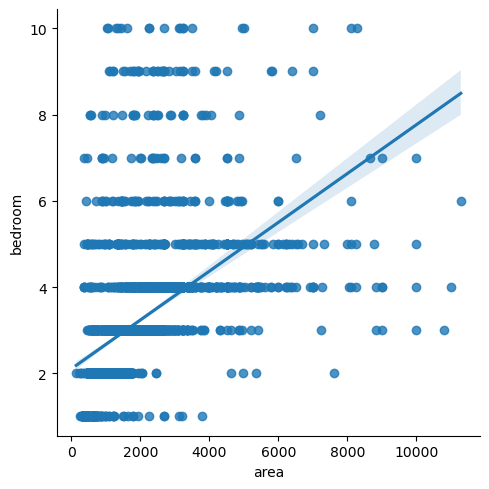

In [159]:
sns.lmplot(df,x="area",y="bedroom")

In [160]:
df["area_room_ratio"]=df["area"]/df["bedroom"]

In [161]:
outl = df[(df["area_room_ratio"]<250) & (df["bedroom"]>3)]

In [162]:
outl["bedroom"]=round(outl["bedroom"]/outl["floorNum"])

C:\Users\USER\AppData\Local\Temp\ipykernel_32896\2343673347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outl["bedroom"]=round(outl["bedroom"]/outl["floorNum"])


In [163]:
df.update(outl)

In [164]:
#recal areaTOroom ratio since bedroom value is chnaged 
df["area_room_ratio"]=df["area"]/df["bedroom"]

In [166]:
df[(df["area_room_ratio"]<250) & (df["bedroom"]>4)].shape

(15, 24)

In [169]:
df = df[~((df["area_room_ratio"]<250) & (df["bedroom"]>4))]

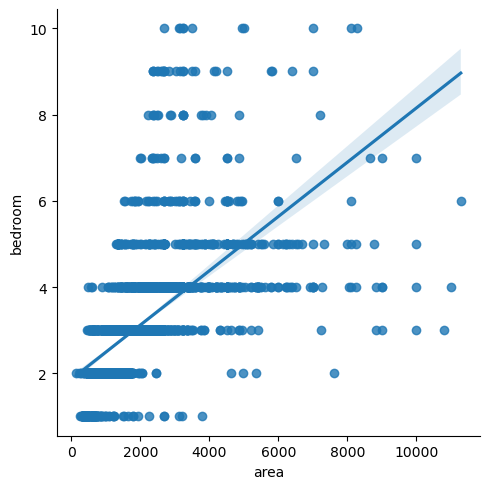

In [170]:
sns.lmplot(df,x="area",y="bedroom")

In [171]:
df.to_csv("outliers_cleaned.csv")